In [27]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("./xlsx/Join_data3.xlsx", index_col = 0)    

# 컬럼 추출
df = all[['DateTime', '종가_ex', '증감률_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
       '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs', '국고1년',
       '국고3년', '국고5년', '국고10년', '통안364일', '통안2년', '전일비_ndf', 'M1_스왑포인트','Mid_ndf']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

df = df.set_index("DateTime")

df["국고1년대비"] =df["국고1년"]-df["국고1년"].shift(1)
df["국고3년대비"] =df["국고3년"]-df["국고3년"].shift(1)
df["국고5년대비"] =df["국고5년"]-df["국고5년"].shift(1)
df["국고10년대비"] =df["국고10년"]-df["국고10년"].shift(1)
df["통안364일대비"] = df["통안364일"] - df["통안364일"].shift(1)
df["통안2년"] = df["통안2년"] - df["통안2년"].shift(1)
df["전날 종가_ex"] = df["종가_ex"].shift(1)
df["종가_NDF차이"] = df["전날 종가_ex"] -df["Mid_ndf"]
df["M1_스왑포인트"] = df["M1_스왑포인트"]/100

df.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
            "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)
df = df.dropna()

# 필요 칼럼만 남기기
df1 = df.copy()
df1 = df1[[ '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs',  
            'M1_스왑포인트',  '국고1년대비', '국고3년대비', '국고5년대비',
       '국고10년대비', '통안364일대비',  '종가_NDF차이',"전날 종가_ex", "종가_ex"]]

# DateTime을 인덱스로 바꿔주기
df1.head()

,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,M1_스왑포인트,국고1년대비,국고3년대비,국고5년대비,국고10년대비,통안364일대비,종가_NDF차이,전날 종가_ex,종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.03,-0.05,-0.05,-0.05,-0.05,-0.01,0.030,0.04,0.04,0.04,2.5,-0.03,-0.04,-0.04,-0.04,-0.03,-7.50,1126.5,1131.7
2012-08-03,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,2.4,-0.02,-0.02,-0.07,-0.07,-0.02,-6.30,1131.7,1134.8
2012-08-06,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,2.4,0.01,0.01,0.00,0.00,0.01,6.30,1134.8,1129.0
2012-08-07,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,2.5,-0.01,0.00,0.00,0.00,-0.01,0.00,1129.0,1128.8
2012-08-08,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,2.4,-0.01,-0.02,-0.02,-0.02,-0.01,-1.45,1128.8,1128.3


In [28]:
x = df1[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs',  
            'M1_스왑포인트',  '국고1년대비', '국고3년대비', '국고5년대비',
       '국고10년대비', '통안364일대비',  '종가_NDF차이',"전날 종가_ex"]]
y = df1["종가_ex"]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,M1_스왑포인트,국고1년대비,국고3년대비,국고5년대비,국고10년대비,통안364일대비,종가_NDF차이,전날 종가_ex
DateTime,,,,,,,,,,,,,,,,,,
2012-08-02,-0.847862,-1.216879,-0.935732,-1.045679,-1.009126,-0.205336,0.707523,0.905683,0.926547,0.826527,1.909409,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-1.648743,-0.149841
2012-08-03,-0.847862,-0.731372,-0.562274,-0.628002,-0.403231,-0.205336,-0.364368,-0.463000,-1.872732,-3.115507,1.818881,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-1.366022,-0.056232
2012-08-06,0.560374,0.482398,0.371369,0.416191,0.202663,-0.003044,-0.602566,-0.691113,-0.939639,-0.833277,1.818881,0.563566,0.160261,0.000879,0.000209,0.107465,1.602547,-0.000426
2012-08-07,0.278727,-0.003110,-0.002088,0.207352,0.404628,0.401540,0.350226,-0.006772,-1.639459,-1.663179,1.909409,-0.567245,-0.001116,0.000879,0.000209,-0.109228,0.118263,-0.104837
2012-08-08,0.278727,0.482398,0.371369,0.416191,0.606592,0.199248,-0.007071,-0.006772,-0.473092,-0.833277,1.818881,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.223358,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-1.945141,-1.309189,-1.881032,-2.220914,-1.621379,-2.150854,-1.603569,-2.572552,-2.285605,-0.896960,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,0.860405,3.207485
2022-07-26,-0.284568,-0.488618,-0.562274,-0.628002,-0.605196,0.199248,-0.721665,-0.691113,-0.473092,-0.418326,-0.987488,0.563566,-0.485246,-0.539435,-0.770625,0.107465,0.754385,3.220086
2022-07-27,-0.284568,-1.216879,-1.122460,-1.254517,-1.211091,0.199248,-0.245269,-0.234886,-0.239819,-0.210850,-0.851696,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.564979,3.110275


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.963867   1Y_대비_irs
1    19.493730   2Y_대비_irs
2     2.662691   3Y_대비_irs
3     6.473130   5Y_대비_irs
4     5.871440  10Y_대비_irs
5     2.662590   1Y_대비_crs
6     5.270776   2Y_대비_crs
7     3.831577   3Y_대비_crs
8     6.696774   5Y_대비_crs
9     3.716435  10Y_대비_crs
10    1.248090    M1_스왑포인트
11    1.897679      국고1년대비
12    1.253730      국고3년대비
13    6.264732      국고5년대비
14    5.058522     국고10년대비
15    1.025134    통안364일대비
16    1.162058    종가_NDF차이
17    1.192675    전날 종가_ex


In [24]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.591e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:58:22   Log-Likelihood:                -6907.1
No. Observations:                2459   AIC:                         1.385e+04
Df Residuals:                    2440   BIC:                         1.396e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
1Y_대비_irs      0.0367      0.257      0.143      0.886      -0.466       0.540
2Y_대비_irs      0.4306      0.359      1.200      0.230      -0.273       1.134
3Y_대비_irs      0.0616      0.133      0.464      0.642      -0.198       0.322
5Y_대비_irs     -0.0225      0.207     -0.109      0.913      -0.428       0.383
10Y_대비_irs    -0.5262      0.197     -2.672      0.008      -0.912      -0.140
1Y_대비_crs     -0.6896      0.133     -5.200      0.000      -0.950      -0.430
2Y_대비_crs      0.0545      0.187      0.292      0.770      -0.311       0.420
3Y_대비_crs     -0.2976      0.159     -1.870      0.062      -0.610       0.014
5Y_대비_crs     -0.3131      0.210     -1.489      0.137      -0.726       0.099
10Y_대비_crs     0.1138      0.157      0.726      0.468      -0.193       0.421
M1_스왑포인트      -1.1724      0.091    -12.912      0.000      -1.350      -0.994
국고1년대비        -0.0096      0.112     -0.086      0.932      -0.229       0.210
국고3년대비        -0.1724      0.091     -1.894      0.058      -0.351       0.006
국고5년대비         0.2633      0.203      1.294      0.196      -0.136       0.662
국고10년대비       -0.0077      0.183     -0.042      0.966      -0.366       0.351
통안364일대비      -0.0045      0.082     -0.055      0.956      -0.166       0.157
종가_NDF차이      -3.9531      0.088    -45.119      0.000      -4.125      -3.781
전날 종가_ex      55.7388      0.089    627.955      0.000      55.565      55.913
==============================================================================
Omnibus:                      208.755   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              896.558
Skew:                           0.304   Prob(JB):                    2.07e-195
Kurtosis:                       5.895   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x_scaled.drop(['2Y_대비_irs'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.743e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:59:34   Log-Likelihood:                -6907.9
No. Observations:                2459   AIC:                         1.385e+04
Df Residuals:                    2441   BIC:                         1.396e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.734    1135.053
1Y_대비_irs      0.2762      0.161      1.714      0.087      -0.040       0.592
3Y_대비_irs      0.0941      0.130      0.724      0.469      -0.161       0.349
5Y_대비_irs      0.0571      0.196      0.292      0.770      -0.327       0.441
10Y_대비_irs    -0.4474      0.186     -2.409      0.016      -0.812      -0.083
1Y_대비_crs     -0.6947      0.133     -5.240      0.000      -0.955      -0.435
2Y_대비_crs      0.0648      0.186      0.348      0.728      -0.301       0.430
3Y_대비_crs     -0.3025      0.159     -1.902      0.057      -0.614       0.009
5Y_대비_crs     -0.3061      0.210     -1.456      0.146      -0.718       0.106
10Y_대비_crs     0.1150      0.157      0.734      0.463      -0.192       0.422
M1_스왑포인트      -1.1720      0.091    -12.906      0.000      -1.350      -0.994
국고1년대비         0.0010      0.112      0.009      0.993      -0.218       0.220
국고3년대비        -0.1647      0.091     -1.814      0.070      -0.343       0.013
국고5년대비         0.2925      0.202      1.448      0.148      -0.104       0.689
국고10년대비       -0.0192      0.183     -0.105      0.916      -0.377       0.339
통안364일대비      -0.0063      0.082     -0.077      0.939      -0.168       0.155
종가_NDF차이      -3.9543      0.088    -45.132      0.000      -4.126      -3.783
전날 종가_ex      55.7362      0.089    628.059      0.000      55.562      55.910
==============================================================================
Omnibus:                      211.575   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.403
Skew:                           0.309   Prob(JB):                    2.75e-199
Kurtosis:                       5.923   Cond. No.                         7.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_irs',	'통안364일대비'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.334e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:59:52   Log-Likelihood:                -6908.2
No. Observations:                2459   AIC:                         1.385e+04
Df Residuals:                    2444   BIC:                         1.393e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
1Y_대비_irs      0.3381      0.136      2.482      0.013       0.071       0.605
10Y_대비_irs    -0.3879      0.155     -2.501      0.012      -0.692      -0.084
1Y_대비_crs     -0.6990      0.132     -5.280      0.000      -0.959      -0.439
2Y_대비_crs      0.0663      0.186      0.356      0.722      -0.299       0.432
3Y_대비_crs     -0.3046      0.159     -1.916      0.055      -0.616       0.007
5Y_대비_crs     -0.3002      0.210     -1.429      0.153      -0.712       0.112
10Y_대비_crs     0.1184      0.157      0.756      0.450      -0.189       0.425
M1_스왑포인트      -1.1714      0.091    -12.907      0.000      -1.349      -0.993
국고1년대비         0.0047      0.111      0.042      0.967      -0.213       0.223
국고3년대비        -0.1623      0.091     -1.789      0.074      -0.340       0.016
국고5년대비         0.3029      0.201      1.508      0.132      -0.091       0.697
국고10년대비       -0.0187      0.182     -0.103      0.918      -0.377       0.339
종가_NDF차이      -3.9530      0.088    -45.154      0.000      -4.125      -3.781
전날 종가_ex      55.7347      0.089    628.519      0.000      55.561      55.909
==============================================================================
Omnibus:                      212.603   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.759
Skew:                           0.310   Prob(JB):                    2.56e-201
Kurtosis:                       5.938   Cond. No.                         6.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
x_scaled.drop(['2Y_대비_crs', '국고1년대비'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.892e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:00:28   Log-Likelihood:                -6908.3
No. Observations:                2459   AIC:                         1.384e+04
Df Residuals:                    2446   BIC:                         1.392e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
1Y_대비_irs      0.3412      0.133      2.558      0.011       0.080       0.603
10Y_대비_irs    -0.3903      0.154     -2.537      0.011      -0.692      -0.089
1Y_대비_crs     -0.6771      0.118     -5.763      0.000      -0.908      -0.447
3Y_대비_crs     -0.2882      0.152     -1.894      0.058      -0.587       0.010
5Y_대비_crs     -0.2729      0.196     -1.395      0.163      -0.657       0.111
10Y_대비_crs     0.1186      0.156      0.758      0.448      -0.188       0.425
M1_스왑포인트      -1.1709      0.091    -12.908      0.000      -1.349      -0.993
국고3년대비        -0.1616      0.090     -1.798      0.072      -0.338       0.015
국고5년대비         0.3074      0.191      1.612      0.107      -0.067       0.681
국고10년대비       -0.0196      0.182     -0.107      0.915      -0.377       0.338
종가_NDF차이      -3.9519      0.087    -45.202      0.000      -4.123      -3.780
전날 종가_ex      55.7352      0.088    630.583      0.000      55.562      55.908
==============================================================================
Omnibus:                      211.562   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.298
Skew:                           0.308   Prob(JB):                    6.48e-200
Kurtosis:                       5.928   Cond. No.                         6.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x_scaled.drop(['10Y_대비_crs', '국고10년대비'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.673e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:00:53   Log-Likelihood:                -6908.6
No. Observations:                2459   AIC:                         1.384e+04
Df Residuals:                    2448   BIC:                         1.390e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
1Y_대비_irs      0.3410      0.131      2.594      0.010       0.083       0.599
10Y_대비_irs    -0.3897      0.151     -2.579      0.010      -0.686      -0.093
1Y_대비_crs     -0.6754      0.117     -5.752      0.000      -0.906      -0.445
3Y_대비_crs     -0.2825      0.152     -1.859      0.063      -0.580       0.015
5Y_대비_crs     -0.1786      0.151     -1.182      0.237      -0.475       0.118
M1_스왑포인트      -1.1721      0.091    -12.926      0.000      -1.350      -0.994
국고3년대비        -0.1623      0.090     -1.807      0.071      -0.339       0.014
국고5년대비         0.2935      0.112      2.626      0.009       0.074       0.513
종가_NDF차이      -3.9528      0.087    -45.249      0.000      -4.124      -3.782
전날 종가_ex      55.7343      0.088    630.814      0.000      55.561      55.908
==============================================================================
Omnibus:                      211.977   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.898
Skew:                           0.310   Prob(JB):                    7.91e-200
Kurtosis:                       5.926   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
x_scaled.drop(['5Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.192e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:01:15   Log-Likelihood:                -6909.3
No. Observations:                2459   AIC:                         1.384e+04
Df Residuals:                    2449   BIC:                         1.390e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
1Y_대비_irs      0.3486      0.131      2.655      0.008       0.091       0.606
10Y_대비_irs    -0.4039      0.151     -2.681      0.007      -0.699      -0.108
1Y_대비_crs     -0.7114      0.113     -6.271      0.000      -0.934      -0.489
3Y_대비_crs     -0.3989      0.116     -3.445      0.001      -0.626      -0.172
M1_스왑포인트      -1.1713      0.091    -12.917      0.000      -1.349      -0.994
국고3년대비        -0.1642      0.090     -1.828      0.068      -0.340       0.012
국고5년대비         0.2779      0.111      2.504      0.012       0.060       0.496
종가_NDF차이      -3.9521      0.087    -45.238      0.000      -4.123      -3.781
전날 종가_ex      55.7364      0.088    630.911      0.000      55.563      55.910
==============================================================================
Omnibus:                      212.835   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.005
Skew:                           0.311   Prob(JB):                    1.37e-201
Kurtosis:                       5.940   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
x_scaled.drop(['국고3년대비'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.835e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:01:38   Log-Likelihood:                -6911.0
No. Observations:                2459   AIC:                         1.384e+04
Df Residuals:                    2450   BIC:                         1.389e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.081    1.4e+04      0.000    1134.735    1135.053
1Y_대비_irs      0.3305      0.131      2.524      0.012       0.074       0.587
10Y_대비_irs    -0.3927      0.151     -2.607      0.009      -0.688      -0.097
1Y_대비_crs     -0.7129      0.113     -6.282      0.000      -0.935      -0.490
3Y_대비_crs     -0.4011      0.116     -3.463      0.001      -0.628      -0.174
M1_스왑포인트      -1.1727      0.091    -12.926      0.000      -1.351      -0.995
국고5년대비         0.2089      0.104      2.000      0.046       0.004       0.414
종가_NDF차이      -3.9555      0.087    -45.266      0.000      -4.127      -3.784
전날 종가_ex      55.7360      0.088    630.608      0.000      55.563      55.909
==============================================================================
Omnibus:                      211.773   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.112
Skew:                           0.309   Prob(JB):                    7.11e-200
Kurtosis:                       5.927   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x_scaled.columns

Index(['1Y_대비_irs', '10Y_대비_irs', '1Y_대비_crs', '3Y_대비_crs', 'M1_스왑포인트',
       '국고5년대비', '종가_NDF차이', '전날 종가_ex'],
      dtype='object')

In [35]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 16.016559814816787, RMSE :  4.002, MAE: 4.002
Variance score :  0.995


In [36]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(4.025895670716911,
 array([3.28272982, 4.85885888, 4.23424744, 3.97982443, 3.77381778]),
 array([-10.77631505, -23.60850965, -17.9288514 , -15.83900252,
        -14.24170062]))

In [42]:
import pandas as pd
import numpy as np

df_ex = pd.read_excel('./xlsx/df_ex.xlsx')
df_ex= df_ex.set_index("DateTime")

In [43]:
df_ex.columns

Index(['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
       '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
       '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y',
       '대비_swapbasis_5Y', '대비_swapbasis_10Y', '대비_국고_1Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
       '전일종가_ex', '종가_ex', '종가_NDF_차이', '베이시스_1Y', '베이시스_2Y', '베이시스_3Y',
       '베이시스_5Y', '베이시스_10Y', 'Swap Point', 'ndf_mid', '국고1년', '국고3년', '국고5년',
       '국고10년', '통안364일', '종가_ex.1', '종가'],
      dtype='object')

MSE : 43.524319206183165, RMSE :  6.597, MAE: 6.597
Variance score :  0.809


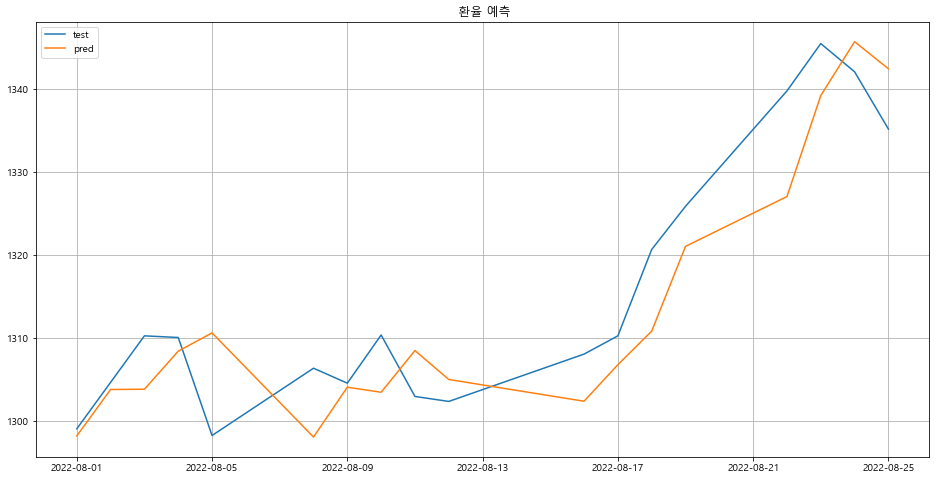

In [45]:
import pandas as pd
import numpy as np

df_ex = pd.read_excel('./xlsx/df_ex.xlsx')
df_ex= df_ex.set_index("DateTime")


df_ex_data=df_ex[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '스왑포인트_1M',
       '대비_국고_5Y', '종가_NDF_차이', '전일종가_ex']]
df_ex_target = df_ex["종가"]



df_ex_data.feature = df_ex_data.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMadf_ex_dataScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(df_ex_data)
data_scaled = scaler.transform(df_ex_data)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_ex_data_scaled = pd.DataFrame(data = data_scaled, columns=df_ex_data.feature)

df_ex_data_scaled.index = df_ex_data.index # 인덱스가 달라서 똑같이 설정

# df_ex_data_scaled = df_ex_data_scaled.dropna()
df_ex_data_scaled


X_train = df_ex_data_scaled[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '스왑포인트_1M',
       '대비_국고_5Y', '종가_NDF_차이', '전일종가_ex']][:2457]
X_test = df_ex_data_scaled[['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '스왑포인트_1M',
       '대비_국고_5Y', '종가_NDF_차이', '전일종가_ex']][2457:]
y_train =  df_ex_target[:2457]
y_test =  df_ex_target[2457:]


import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


# 시각화
import matplotlib.pyplot as plt
from matplotlib import rc 
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(16,8))
plt.title(' 환율 예측')
# plt.xlable('날짜')
# plt.ylable('종가')
plt.plot(y_test.index, y_test.values, label="test")
plt.plot(y_test.index, y_pred, label="pred")
plt.legend(loc='best')
plt.grid()
plt.show()